In [2]:
# import analysis library
import pandas as pd, numpy as np 
import seaborn  as sns
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline
plt.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


In [19]:
# credit 
# http://nbviewer.jupyter.org/github/JWarmenhoven/Machine-Learning/blob/master/notebooks/Programming%20Exercise%202%20-%20Logistic%20Regression.ipynb#Logistic-regression-hypothesis


#### Logistic regression hypothesis
##### $$ h_{\theta}(x) = g(\theta^{T}x)$$
##### $$ g(z)=\frac{1}{1+e^{−z}} $$

- $ h_{\theta}(x)$: hypothesis
- $ g(z)$ : sigmoid function 

In [20]:
# define sigmoid function 
def sigmoid(z):
    return(1 / (1 + np.exp(-z)))

In [17]:
x = np.arange(-10,10)
y = sigmoid(x)

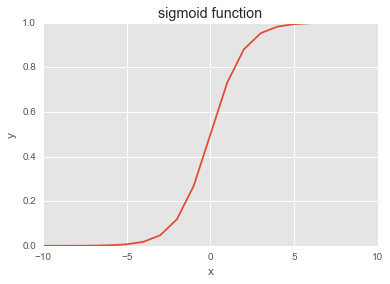

In [21]:
# take a view of sigmoid
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('sigmoid function')

#### Cost Function
##### $$ J(\theta) = \frac{1}{m}\sum_{i=1}^{m}\big[-y^{(i)}\, log\,( h_\theta\,(x^{(i)}))-(1-y^{(i)})\,log\,(1-h_\theta(x^{(i)}))\big]$$
#### Vectorized Cost Function
##### $$ J(\theta) = \frac{1}{m}\big((\,log\,(g(X\theta))^Ty+(\,log\,(1-g(X\theta))^T(1-y)\big)$$

# ------------

#### Partial derivative

##### $$ \frac{\delta J(\theta)}{\delta\theta_{j}} = \frac{1}{m}\sum_{i=1}^{m} ( h_\theta (x^{(i)})-y^{(i)})x^{(i)}_{j} $$ 
#### Vectorized
##### $$ \frac{\delta J(\theta)}{\delta\theta_{j}} = \frac{1}{m} X^T(g(X\theta)-y)$$

- In this nb, I only run the application with non-vectorize version

In [46]:
# define cost function 
def costFunction(theta, X, y):
    m = y.size
    h = sigmoid(X.dot(theta))
    
    J = -1*(1/m)*(np.log(h).T.dot(y)+np.log(1-h).T.dot(1-y))
               
    if np.isnan(J[0]):
        return(np.inf)
    return(J[0])

# define gradient method 
def gradient(theta, X, y):
    m = y.size
    h = sigmoid(X.dot(theta.reshape(-1,1)))
    
    grad =(1/m)*X.T.dot(h-y)

    return(grad.flatten())

In [57]:
# let's make some toy data 

#X = np.c_[np.ones((data.shape[0],1)), data[:,0:2]]
#y = np.c_[data[:,2]]